# ECE 2260 - Fundamentals of Electrical Circuits
## Lab 5 - RC Circuits

### Purpose

The purpose of this lab is to sumulate and measure the time constant of an RC Circuit

### Equipment

- Breadboard
- Multimeter
- Power Supply
- Signal Generator
- Oscilloscope
- Resistor: 10kΩ
- Capacitor: 0.1µF

### Preliminary

1. In Python, write an analytical solution for $v_o(t)$ (the voltage across the capacitor) assuming $V_i$ is a 0 to 5V step function. Then use Python to graph the function from $t\in[0s,5\tau]$
2. Using LTspice, create and simulate the RC circuit and use the cursors to identify $\tau$
3. Use the

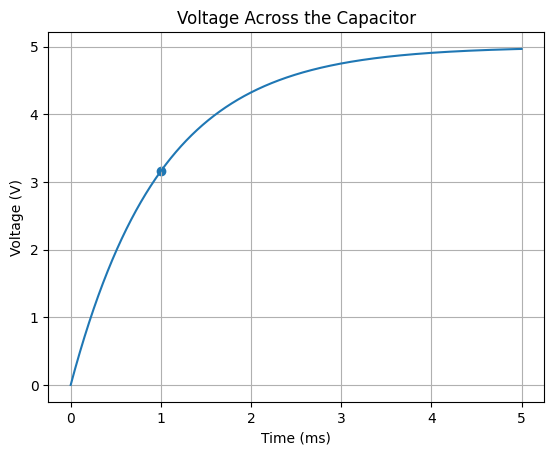

In [1]:
'''
Author: Hunter Van Horn, Dexter Ward
Date: 02/06/2025
This program
'''
import numpy as np
import matplotlib.pyplot as plt

def calculateτ(r, c):
    return r*c

def capacitorResponse(vf, vo, t, τ):
    return vf+(vo-vf)*np.exp(-t/τ)

def positionAtτ(yVal, vf, vo):
    return np.argmax(yVal > capacitorResponse(vf,vo,1,1))

def graphResponse():
    r = 10000
    c = .0000001
    τ = calculateτ(r,c)
    vf = 5
    vo = 0
    stepSize = .000001
    xVal = np.array([0])
    yVal = np.array([capacitorResponse(vf, vo, xVal[-1], τ)])

    while(xVal[-1] < 5*τ):
        xVal = np.append(xVal, [xVal[-1]+stepSize])
        yVal = np.append(yVal, [capacitorResponse(vf, vo, xVal[-1], τ)])

    xVal = xVal*1000

    plt.plot(xVal,yVal)
    plt.scatter(xVal[positionAtτ(yVal, vf, vo)],yVal[positionAtτ(yVal, vf, vo)])
    plt.xlabel('Time (ms)')
    plt.ylabel('Voltage (V)')
    plt.title('Voltage Across the Capacitor')
    plt.grid()
    plt.show()

if __name__ == '__main__':
    graphResponse()